# Q1 code saved in C:\\Users\\cwk05\\Desktop\\DDM\\5001\\Homework2\\Q1.py

from mpi4py import MPI
import sys

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

n=50

t0 = MPI.Wtime()
for i in range(n):
    if rank==0:
        comm.send(f'Message {i}',dest=1,tag=i)
        print(f'rank {rank} sends {i} to rank {rank+1}')
        sys.stdout.flush()
        rn = comm.recv(source=size-1,tag=(size-1)*size+i)
        print(f'rank {rank} receives {rn} from rank {size-1}')
        sys.stdout.flush()
    
    elif rank < size - 1:
        rn = comm.recv(source=rank-1,tag=(rank-1)*size+i)
        print(f'rank {rank} receives {rn} from rank {rank-1}')
        sys.stdout.flush()
        comm.send(rn,dest=rank+1,tag=rank*size+i)
        print(f'rank {rank} sends {rn} to rank {rank+1}')
        sys.stdout.flush()
        
    else:
        rn = comm.recv(source=rank-1,tag=(rank-1)*size+i)
        print(f'rank {rank} receives {rn} from rank {rank-1}')
        sys.stdout.flush()
        comm.send(rn,dest=0,tag=rank*size+i)
        print(f'rank {rank} sends {rn} to rank 0')
        sys.stdout.flush()

dt = MPI.Wtime() - t0
print(f'Elapsed time for process {rank} out of {size}: {dt} seconds')

In [1]:
# Q1 execution code
from IPython import get_ipython
ip = get_ipython()
ip.run_cell("!mpiexec -n 4 python C:\\Users\\cwk05\\Desktop\\DDM\\5001\\Homework2\\Q1.py")

rank 0 sends 0 to rank 1
rank 1 receives Message 0 from rank 0
rank 1 sends Message 0 to rank 2
rank 2 receives Message 0 from rank 1
rank 2 sends Message 0 to rank 3
rank 3 receives Message 0 from rank 2
rank 3 sends Message 0 to rank 0
rank 0 receives Message 0 from rank 3
rank 0 sends 1 to rank 1
rank 1 receives Message 1 from rank 0
rank 1 sends Message 1 to rank 2
rank 2 receives Message 1 from rank 1
rank 2 sends Message 1 to rank 3
rank 3 receives Message 1 from rank 2
rank 3 sends Message 1 to rank 0
rank 0 receives Message 1 from rank 3
rank 0 sends 2 to rank 1
rank 1 receives Message 2 from rank 0
rank 1 sends Message 2 to rank 2
rank 2 receives Message 2 from rank 1
rank 2 sends Message 2 to rank 3
rank 3 receives Message 2 from rank 2
rank 3 sends Message 2 to rank 0
rank 0 receives Message 2 from rank 3
rank 0 sends 3 to rank 1
rank 1 receives Message 3 from rank 0
rank 1 sends Message 3 to rank 2
rank 2 receives Message 3 from rank 1
rank 2 sends Message 3 to rank 3
rank 

<ExecutionResult object at 252235ba310, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 25223589af0, raw_cell="!mpiexec -n 4 python C:\Users\cwk05\Desktop\DDM\50.." store_history=False silent=False shell_futures=True> result=None>

# Q2 function saved in cal_pi.py

def cal_pi(array,sum_i,lock):
    for j in array:  
        with lock:
            sum_i.value += f(j)

def f(x):
    return 4 / (1 + x**2)

In [4]:
# Q2 main code
from multiprocessing import Process, Value, Lock
import numpy as np
import time
import cal_pi

#functions saved in separate file for Jupyter
#def cal_pi(array,sum_i,lock):
#    for j in array:  
#        with lock:
#            sum_i.value += f(j)

#def f(x):
#    return 4 / (1 + x**2)

n_process = 4
sep = 100000
N = sep // n_process
data = np.linspace(0,1,sep)
p_data = [[] for i in range(n_process)]
for i in range(n_process-1):
    p_data[i] = data[i*N:(i+1)*N]
p_data[-1] = data[(n_process-1)*N:]

if __name__ == '__main__':
    x = Value('d',0)
    lock = Lock()
    processes = []
    for i in range(n_process):
        p = Process(target=cal_pi.cal_pi, args=(p_data[i],x,lock))
        processes.append(p)
    t0 = time.time()
    for p in processes:
        p.start()
    for p in processes:
        p.join()
    print(f'pi = {x.value/sep}')
    print(f'Process time with {n_process} processes is {time.time()-t0} seconds.')


pi = 3.1415912376465953
Process time with 4 processes is 0.706528902053833 seconds.


# Q3 function saved in count_in.py
def count_in(data):
    a = data[0]
    b = data[1]
    if a*a + b*b < 1:
        return 1
    return 0

In [8]:
# Q3 main code
from multiprocessing import Pool
import numpy as np
import time
import count_in

#functions saved in separate file for Jupyter
#def count_in(data):
#    a = data[0]
#    b = data[1]
#    if a*a + b*b < 1:
#        return 1
#    return 0
    
if __name__ == '__main__':
    n=100000
    m=4
    xx = np.random.random(n)
    yy = np.random.random(n)
    data = [(xx[i],yy[i]) for i in range(len(xx))]
    p = Pool(m)
    t0 = time.time()
    result = p.map(count_in.count_in,data)
    p.close()
    p.join()
    print(f'pi = {sum(result)*4/n}')
    print(f'Process time using Pool with n={m}: {time.time()-t0} seconds.')


pi = 3.1396
Process time using Pool with n=4: 0.5585596561431885 seconds.


# Q4 function saved in QC_func.py

var_dict = {}

def init_dict(X, X_shape):
    var_dict['X'] = X
    var_dict['X_shape'] = X_shape

def update(grid_point):
    X_np = np.frombuffer(var_dict['X']).reshape(var_dict['X_shape'])
    last = var_dict['X_shape'][0]
    for k in range(1000):
        for item in grid_point:
            i = item[0]
            j = item[1]
            if j != 0 and j != last-1 and i != 0 and i != last-1:
                X_np[i,j] = (1/4)*(X_np[i-1,j]+X_np[i+1,j]+X_np[i,j-1]+X_np[i,j+1])

Process time for 1 process is 13.07398533821106 seconds
Result:


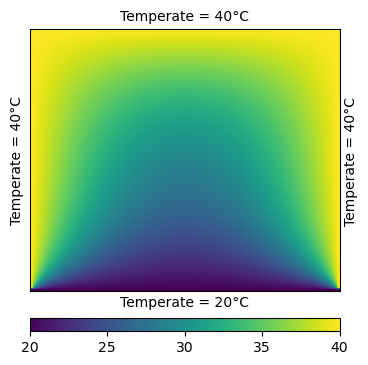

Process time for 2 processes is 7.404476881027222 seconds
Result:


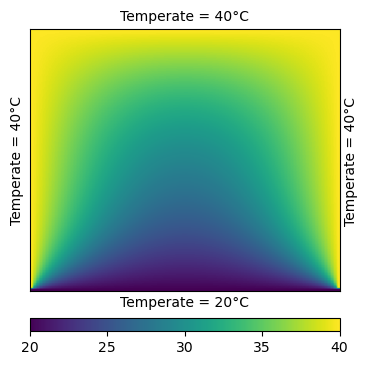

Process time for 3 processes is 5.466016054153442 seconds
Result:


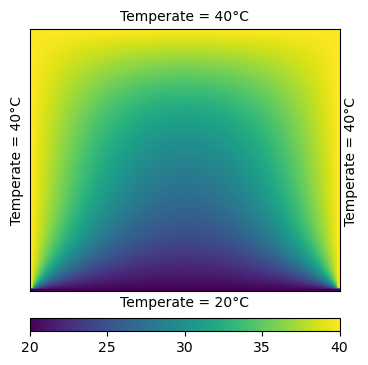

Process time for 4 processes is 4.96853232383728 seconds
Result:


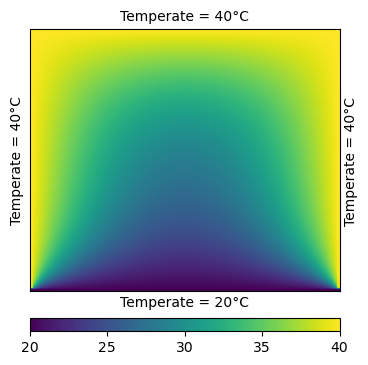

Process time for 5 processes is 5.031095266342163 seconds
Result:


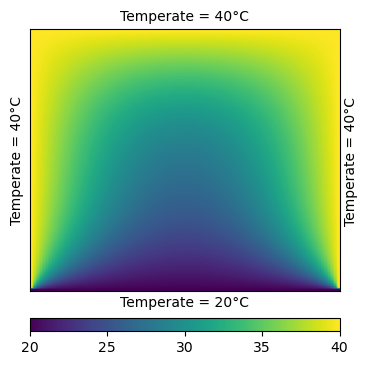

Process time for 6 processes is 4.787510395050049 seconds
Result:


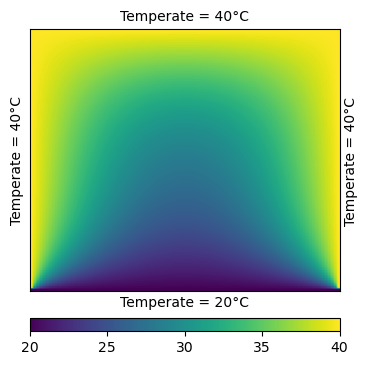

Process time for 7 processes is 4.892854928970337 seconds
Result:


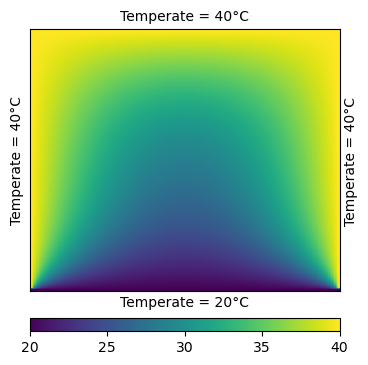

Process time for 8 processes is 4.572030544281006 seconds
Result:


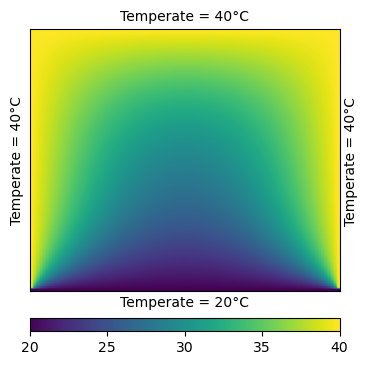

Summary:
            Processing_time   Speedup  Efficiency
Processors                                       
1                 13.073985  1.000000    1.000000
2                  7.404477  1.765687    0.882843
3                  5.466016  2.391867    0.797289
4                  4.968532  2.631358    0.657839
5                  5.031095  2.598636    0.519727
6                  4.787510  2.730853    0.455142
7                  4.892855  2.672057    0.381722
8                  4.572031  2.859558    0.357445


In [9]:
# Q4 code
from multiprocessing import RawArray,Pool
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import pandas as pd
import Q4_func

def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

#functions saved in separate file for Jupyter

#var_dict={}

#def init_dict(X, X_shape):
#    var_dict['X'] = X
#    var_dict['X_shape'] = X_shape

#def update(grid_point):
#    X_np = np.frombuffer(var_dict['X']).reshape(var_dict['X_shape'])
#    last = var_dict['X_shape'][0]
#    for k in range(1000):
#        for item in grid_point:
#            i = item[0]
#            j = item[1]
#            if j != 0 and j != last-1 and i != 0 and i != last-1:
#                X_np[i,j] = (1/4)*(X_np[i-1,j]+X_np[i+1,j]+X_np[i,j-1]+X_np[i,j+1])
    
def heat_square(nx=100,T0=20,T1=40,Ts=25,p=1):
    # nx*nx is the grid size
    # T0 is the constant temperature of one side of the square plate 
    # T1 is the constant temperature of the other three sides of the square plate
    # Ts is the surrounding temperature
    # p is the number of process
    # i is the number of iteration
    T = np.ones((nx,nx))*Ts # holds the calculated temperatures
    gridpoints = [(i,j) for i in range(nx) for j in range(nx)]
    grid = partition(gridpoints,p)
    X_shape = (nx,nx)
    X = RawArray('d',nx*nx)
    X_np = np.frombuffer(X).reshape(X_shape)
    T[:,0] = T1 # left boundary
    T[:,nx-1] = T1 # right boundary
    T[0,:] = T1 # top boundary
    T[nx-1,:] = T0 # bottom boundary
    np.copyto(X_np, T)
    with Pool(processes=p, initializer=Q4_func.init_dict, initargs=(X, X_shape)) as pool:
        pool.map(Q4_func.update, grid)
        pool.close()
        pool.join()
    T = X_np.copy()
    return T

def plotting(T,nx):
    fig, (ax,cax) = plt.subplots(2,1,figsize=(4,4),dpi=100,gridspec_kw={"height_ratios":[1, 0.05]})
    heat = ax.imshow(T,aspect='auto')
    ax.set_title(u'Temperate = 40\N{DEGREE SIGN}C',fontsize=10)
    ax.set_xlabel(u'Temperate = 20\N{DEGREE SIGN}C',fontsize=10)
    ax.set_ylabel(u'Temperate = 40\N{DEGREE SIGN}C',rotation=90,fontsize=10)
    ax.tick_params(axis='both',
                   which='both',
                   bottom=False,
                   top=False,
                   left=False,
                   right=False,
                   labelbottom=False,
                   labelleft=False)    
    ax.text(nx*1.01,nx/2,u'Temperate = 40\N{DEGREE SIGN}C',rotation=90,fontsize=10,va='center',ha='left')
    fig.colorbar(heat, cax=cax, orientation="horizontal")
    plt.show()

if __name__ == '__main__':
    processors=[1,2,3,4,5,6,7,8]
    times = []
    for i in processors:
        t0=time.time()
        T = heat_square(nx=100,T0=20,T1=40,Ts=25,p=i)
        processing_time = time.time()-t0
        times.append(processing_time)
        if i==1:
            print(f'Process time for {i} process is {processing_time} seconds')
        else:
            print(f'Process time for {i} processes is {processing_time} seconds')
        print('Result:')
        plotting(T,100)
    speedup = [times[0]/i for i in times]
    efficiency = [speedup[i]/processors[i] for i in range(len(processors))]
    data = [[processors[i],times[i],speedup[i],efficiency[i]] for i in range(len(processors))] 
    df = pd.DataFrame(data,columns=['Processors','Processing_time','Speedup','Efficiency']).set_index('Processors')
    print('Summary:')
    print(df)
        